# <font color="880000"> Lecture Notes: The Solow Growth Model </font>

## <font color="880000"> 1: The Basics of the Model </font>

### <font color="000088"> 1.1: The Equilibrium Condition </font>

Suppose that we have an economy in which the labor force $L$ is growing at a constant rate $n$, in which the efficiency-of-labor $E$ is growing at a constant rate $g$ and in which total income and production $ Y $ (and average income and production per worker $ y $ depends on the size of the labor force, the value of the efficiency-of-labor, and the capital-intensity of the economy $ \kappa $ thus: 

>(1.1) $ Y = \kappa^\theta E L $

>(1.2) $ y = \kappa^\theta E $

where $ \theta $ is a parameter that summarizes the relative importance of capital-intensity vis-a-vis the efficienc-of-labor in economic growth: a one-percent increase in the efficiency-of-labor $ E $ will raise total income $Y$ and per-worker income $y$ both by one percent; a one-percent increase in the capital-intensity $ \kappa $ will increase total income $Y$ and per-worker income $y$ both by only $ \theta $ percent; the higher is $\theta $, the more salient is capital-intensity—and thus saving and investing to raise and then maintain capital-intensity—in the process of economic growth.

In [ ]:
# CODE CELL "n & g"
#
# Getting a sense of how the Solow growth model
# works...
#
# What are the implications of saying that the
# labor force L increases at a gross rate n?
# Or that the efficiency-of-labor E increases
# at a growth rate g? Or that the elasticity
# of output Y with respect to the economy's
# capital-intensity κ is a parameter θ?
# These code cells are for you to experiment,
# and find out. They set out simple finger
# exercises for you to investigate.
#
# This code cell allows you to explore what
# various values for the parameters n and g
# (and also initial values L_0 and E_0) really
# mean.
#
# Simply substitute your own choices of values
# for L_0, n, E_0, g, and the length t of the
# period you want to examine in the lines 
# L_0 = 1, n = 0.01, E_0 = 1, g = 0.02, and
# T = 100. Then execute this code cell.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

L_0 = 1
n = 0.01
E_0 = 1
g = 0.02
T = 100

L_series = [L_0]
E_series = [E_0]
L = L_0
E = E_0

for i in range(T):
    L = L*np.exp(n)
    E = E *np.exp(g)
    L_series = L_series + [L]
    E_series = E_series + [E]

n_and_g_df = pd.DataFrame()
n_and_g_df['Labor Force'] = L_series
n_and_g_df['Efficiency'] = E_series

n_and_g_df.plot(title = 'Labor Force and Efficiency of Labor')
plt.show()

In [ ]:
# CODE CELL "Y & θ"
#
# This code cell allows you to explore what
# various values for the parameter θ means.
# Simply choose values for the efficiency-of-
# labor E, for the lafor force L, choose a 
# maximum value for capital-intensity κ and 
# a value for θ in the code lines below, 
# and then execute this code cell.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

L = 1
E = 1
κ_max = 50
θ = 2

κ_series = [0]
Y_series = [0]

for κ in range(κ_max):
    Y = κ**θ * E * L
    κ_series = κ_series + [κ]
    Y_series = Y_series + [Y]

Y_and_κ_df = pd.DataFrame()
Y_and_κ_df['capital_intensity'] = κ_series
Y_and_κ_df['production'] = Y_series

Y_and_κ_df.set_index('capital_intensity')

Y_and_κ_df.production.plot(title = 'Production as a Function of Capital Intensity')
plt.show()

&nbsp;

Multiply the economy's capital-intensity $ \kappa $ by the economy's level of total income and production $ Y$ and you get the economy's capital stock $ K$:

>(1.3) $ K = \kappa Y $

the amount of produced means of production that the economy has inherited from its past.

Now take the natural log of (1.1) and then take the time derivative of the result:

>(1.4) $ \ln(Y) = \theta\ln(\kappa) + \ln(L) + \ln(E) $

>(1.5) $ \frac{1}{Y}\frac{dY}{dt} = g_Y = \theta \left(  \frac{1}{\kappa}\frac{d\kappa}{dt} \right) +  \frac{1}{L}\frac{dL}{dt} +  \frac{1}{E}\frac{dE}{dt} $

We assumed that the second term on the right-hand-side of (1.5) is n and that the third term is g. If $ \kappa $ is constant, then the left-hand-side will be equal to n+g: that will then be the proportional growth rate of $ Y $. If $Y$ is growing at rate $n+g$ and $ \kappa $ is constant, then the economy's capital-stock $K$ will also be growing at $n+g$. Everything will then be in _balanced growth_.

Assume that a constant fraction $ s $ of income $ Y $ is saved and invested to add to the capital stock. Assume that a share $ \delta $ of the capital stock rusts and erodes and disappears each year. Then the capital-stock $ K$ is going to be changing at:

>(1.6) $ \frac{dK}{dt} = sY - \delta K $

And the capital-stock will be growing at a proportional growth rate:

>(1.7) $ \frac{1}{K}\frac{dK}{dt} = g_{\kappa} = \frac{s}{\kappa} - \delta $

Thus the capital-stock will be growing at the rate $n+g$ required for balanced growth if and only if:

>(1.8) $ \frac{s}{\kappa} - \delta = n + g $

In [ ]:
# CODE CELL "𝜅^*"
#
# This code cell will plot how the proportional growth
# rate g_𝜅 of capital-intensity 𝜅 varies with the level
# of capital-intensity 𝜅.
#
# You will discover that the growth rate of capital-
# intensity 𝜅 is equal to zero if and only if:
#
#    𝜅 = 𝜅^* = s/(n+g+𝛿)
#
# Either accept the values given below for s, n, g, and
# 𝛿, or substitute your own in the relevant code lines:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

s = 0.20
n = 0.01
g = 0.015
𝛿 = 0.025

𝜅_star = s/(n+g+𝛿)
𝜅_max = 2*𝜅_star
𝜅_min = 0.5

d𝜅_series = []
𝜅_series = []
zero_series = []

for j in range(round(10*𝜅_min), 10*round(𝜅_max)):
    𝜅 = j/10
    d𝜅_series = d𝜅_series + [s/𝜅 - (n+g+𝛿)]
    𝜅_series = 𝜅_series + [𝜅]
    zero_series = zero_series + [0]

𝜅_and_d𝜅_df = pd.DataFrame()
𝜅_and_d𝜅_df['rate_of_change_in_capital_intensity'] = d𝜅_series
𝜅_and_d𝜅_df['capital_intensity'] = 𝜅_series
𝜅_and_d𝜅_df['zero'] = zero_series

ax = plt.gca()

𝜅_and_d𝜅_df.plot(kind='line', x='capital_intensity', y='zero', ax=ax)
𝜅_and_d𝜅_df.plot(kind='line', x='capital_intensity', 
            y='rate_of_change_in_capital_intensity',
            title = 'Capital Intensity and Its Rate of Change',
            ax=ax)
plt.show()

which happens only when:

>(1.9) $ \kappa^* = \frac{s}{n+g+\delta} $

This $ \kappa^* $ we define as the _steady-state balanced-growth equilibrium_ value of capital-intensity in the Solow growth model. If the capital-intensity $ \kappa = \kappa^* $, then it is constant, and the economy is in balanced growth, with $Y$ and $K$ growing at the rate n+g, $E$ and $y$ growing at the rate g, and $L$ growing at the rate $n$.

&nbsp;

### <font color="000088"> 1.2: Convergence to Equilibrium </font>

What if $ \kappa ≠ \kappa^* $? What happens then?


Well, it is still the case that:

>(1.7) $ \frac{1}{K}\frac{dK}{dt} = \frac{s}{\kappa} - \delta $

And by taking the natural log and the time derivative of (1.3) we get:

>(1.8) $ \frac{1}{\kappa}\frac{d\kappa}{dt} = \frac{1}{K}\frac{dK}{dt}  -  \frac{1}{Y}\frac{dY}{dt} $

Substituting (1.5) into (1.8):

>(1.9) $ \frac{1}{\kappa}\frac{d\kappa}{dt} = \frac{1}{K}\frac{dK}{dt}  - \left[ \theta \left(  \frac{1}{\kappa}\frac{d\kappa}{dt} \right) +  n + g \right] $

Substituting (1.7) into (1.9):

>(1.10) $ \frac{1}{\kappa}\frac{d\kappa}{dt} = \frac{s}{\kappa} - \delta - \left[ \theta \left(  \frac{1}{\kappa}\frac{d\kappa}{dt} \right) +  n + g \right] $

Moving the terms in $ \kappa $ to the left:

>(1.11) $ (1+\theta)\frac{1}{\kappa}\frac{d\kappa}{dt} = \frac{s}{\kappa} - \delta -  n - g $

And solving for the rate-of-change of capital-intensity $ \kappa $:

>(1.12) $ \frac{1}{\kappa}\frac{d\kappa}{dt} = \frac{\frac{s}{\kappa} - \delta -  n - g}{1+\theta} $

Multiplying through by $ \kappa $:

>(1.13) $ \frac{d\kappa}{dt} = \frac{s - (n+g+\delta)\kappa}{1+\theta} $

Recall from (1.9) that:

>(1.14) $ s = (n+g+\delta)\kappa^* $

So (1.13) then becomes:

>(1.15) $ \frac{d\kappa}{dt} = -\left[(n+g+\delta)/(1+\theta) \right](\kappa-\kappa^*) $


For historical reasons, every single other book writes, instead:

>(1.16) $ \frac{d\kappa}{dt} = -(1-\alpha)(n+g+\delta)(\kappa-\kappa^*) $

making the replacement:

>(1.17) $ 1 - \alpha = \frac{1}{1+\theta}  $

where $ \alpha $ is the share of income received by capital and $ 1 - \alpha $ is the share of income received by labor in a two-factor constant-returns-to-scale economy in which the marginal product theory of distribution holds. To make some of our expressions simpler, we will sometimes copy this. But this is purely for convenience: there is no real difference between the $\alpha$-forms and the $\theta$-forms, for $ \theta = \alpha/(1-\alpha) $ and $\alpha = \theta/(1+\theta) $, and you can always move back and forth between them.

From equation (1.16) and knowledge of the initial level of an economy's capital-intensity—$ \kappa = \kappa_0 $ at some initial moment we index as zero—it immediately follows that at every time $ t > 0 $:

>(1.18) $ \kappa_t = \kappa^* + e^{-[(n+g+\delta)/(1+\theta)]t}(\kappa_0 - \kappa^*) $

(1.16) holds always, for that moment's values of $n, g, \delta, and s $ (and $\alpha-\theta)$ whatever they may be. (1.18) holds only while $n, g, \delta, and s $ (and $\alpha-\theta)$ are constant. If any of them change, you then have to recalibrate and recompute, with a new initial value of $ \kappa $ equal to its value when the model's parameters jumped, and a new and different value of $ \kappa $. But if $n, g, \delta, and s $ (and $\alpha-\theta)$ are constant or near-constant, then (1.18) is a very powerful tool: it tells us that the economy's capital-intensity $ \kappa $ follows over time a path of exponential convergence, reducing the gap between its value and $ \kappa^* $ at any time t to a fraction $ 1/e $ of its previous value as of time $ t + \Delta_{1/e}t $, where this $ 1/e $ convergence time is:

>(1.19) $ \Delta_{1/e}t = (n+g+\delta)/(1+\theta)$.

In [ ]:
# CODE CELL "convergence of 𝜅 to 𝜅^*"
#
# This code cell will plot how the the economy's
# capital-intensity 𝜅 converges to its steady-
# state balanced-growth level 𝜅^* no matter what
# the initial condition 𝜅_0.
#
# Either accept the values given below for s, n, g, 𝛿,
# θ, 𝜅_0 and the time T you wish to calculate for,
# or substitute your own in the relevant code lines:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


𝜅_0 = 8
s = 0.20
n = 0.01
g = 0.015
𝛿 = 0.025
θ = 1
T = 200

𝜅_star = s/(n+g+𝛿)
𝜅_max = 2*𝜅_star
𝜅_min = 0.5

𝜅_star_series = [𝜅_star]
𝜅_series = [𝜅_0]

for t in range(T):
    𝜅_star_series = 𝜅_star_series + [𝜅_star]
    𝜅_series = 𝜅_series + [𝜅_star + (𝜅_series[t-1] - 𝜅_star)*np.exp(-(n+g+𝛿)/(1+θ))]


𝜅_convergence_df = pd.DataFrame()
𝜅_convergence_df['steady_state_capital_intensity'] = 𝜅_star_series
𝜅_convergence_df['capital_intensity'] = 𝜅_series

ax = plt.gca()

𝜅_convergence_df.capital_intensity.plot(ax=ax)
𝜅_convergence_df.steady_state_capital_intensity.plot(ax=ax,
                 title = 'Convergence of Capital-Intensity')

plt.show()

In [1]:
# CODE CELL "convergence of 𝜅 to 𝜅^*"
#
# This code cell will plot how the the economy's
# capital-intensity 𝜅 converges to its steady-
# state balanced-growth level 𝜅^* no matter what
# the initial condition 𝜅_0.
#
# Either accept the values given below for s, n, g, 𝛿,
# θ, 𝜅_0 and the time T you wish to calculate for,
# or substitute your own in the relevant code lines:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class 𝜅_convergence_graph:

    def __init__(self, 𝜅_0 = 3,
                       s = 0.20,
                       n = 0.01,
                       g = 0.015,
                       𝛿 = 0.025,
                       θ = 1,
                       T = 200):
        self.𝜅_0, self.s, self.n, self.g, self.𝛿, self.θ, self.T = 𝜅_0, s, n, g, 𝛿, θ, T 

    def draw(self):
        "Draw the convergence graph"
        𝜅_0, s, n, g, 𝛿, θ, T = self.𝜅_0, self.s, self.n, self.g, self.𝛿, self.θ, self.T
        𝜅_star = s/(n+g+𝛿)
        𝜅_max = 2*𝜅_star
        𝜅_min = 0.5

        𝜅_star_series = [𝜅_star]
        𝜅_series = [𝜅_0]

        for t in range(T):
            𝜅_star_series = 𝜅_star_series + [𝜅_star]
            𝜅_series = 𝜅_series + [𝜅_star + (𝜅_series[t-1] - 𝜅_star)*np.exp(-(n+g+𝛿)/(1+θ))]


        𝜅_convergence_df = pd.DataFrame()
        𝜅_convergence_df['steady_state_capital_intensity'] = 𝜅_star_series
        𝜅_convergence_df['capital_intensity'] = 𝜅_series

        ax = plt.gca()
        
        𝜅_convergence_df.capital_intensity.plot(ax=ax)
        𝜅_convergence_df.steady_state_capital_intensity.plot(ax=ax,
                 title = 'Convergence of Capital-Intensity')
        


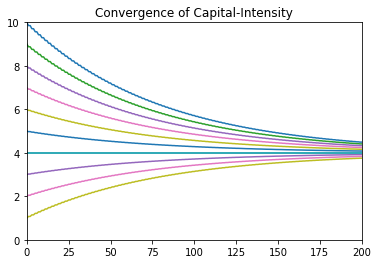

In [2]:
plt.cla()

𝜅_max = 10
𝜅 = 𝜅_max

for i in range(10):
    cg = 𝜅_convergence_graph(𝜅_0=𝜅)
    cg.draw()
    𝜅 = 𝜅-1

plt.ylim(0, 𝜅_max)
plt.show()
    

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.cla()

𝜅_0 = 10

for j in range(5):
    s = 0.20
    n = 0.01
    g = 0.015
    𝛿 = 0.025
    θ = 1
    𝜅_0 = 𝜅_0 - 2
    T = 200

    𝜅_star = s/(n+g+𝛿)
    𝜅_max = 2*𝜅_star
    𝜅_min = 0.5

    𝜅_star_series = [𝜅_star]
    𝜅_series = [𝜅_0]

    for t in range(T):
        𝜅_star_series = 𝜅_star_series + [𝜅_star]
        𝜅_series = 𝜅_series + [𝜅_star + (𝜅_series[t-1] - 𝜅_star)*np.exp(-(n+g+𝛿)/(1+θ))]


    𝜅_convergence_df = pd.DataFrame()
    𝜅_convergence_df['steady_state_capital_intensity'] = 𝜅_star_series
    𝜅_convergence_df['capital_intensity'] = 𝜅_series

    ax = plt.gca()

    𝜅_convergence_df.capital_intensity.plot(ax=ax)
    𝜅_convergence_df.steady_state_capital_intensity.plot(ax=ax,
                 title = 'Convergence of Capital-Intensity')

plt.show()

&nbsp;

Given our knowledge of (1.18), of the initial values of capital-intensity, the labor force, and the efficiency-of-labor $ \kappa_0, L_0,$ and $ E_0 $; of the parameters $ s, n, g, \delta$; and of $\theta $ (or $\alpha$), we can immediately calculate all the other variables in the economy from:

>(1.20) $ Y_t = \left(\kappa_t \right)^\theta E_t L_t = \left(\kappa_t \right)^\theta e^{gt}E_0 e^{nt}L_0$

>(1.21) $ y_t = \left(\kappa_t \right)^\theta E_t  = \left(\kappa_t \right)^\theta e^{gt}E_0 $

>(1.22) $ K_t = \kappa_t Y_t $

>(1.23) $ L_t = e^{nt}L_0 $

>(1.24) $ E_t = e^{gt}E_0 $

## <font color="880000"> Lecture Notes: The Solow Growth Model </font>

<img src="https://tinyurl.com/20181029a-delong" width="300" style="float:right" />

* Ask me two questions…
* Make two comments…
* Further reading…

<br clear="all" />

----

Github: <https://github.com/braddelong/long-form-drafts/blob/master/solow-model.ipynb>   
nbViewer: <https://nbviewer.jupyter.org/github/braddelong/long-form-drafts/blob/master/solow-model.ipynb>

&nbsp;

----